# 33 - Effect Size vs Statistical Significance

**Key Idea:** Just because something is "statistically significant" doesn't mean it's important in the real world.

**Two Questions to Ask:**
- **P-value:** Is this effect real? (or just random chance?)
- **Effect Size:** Does this effect actually matter?

**Remember:** Large samples can make tiny, unimportant differences look "statistically significant."

## Simple Example: Study Method Test

You test a new study method with 10,000 students. It raises test scores by 0.1%. With such a large sample, the p-value is tiny (p < 0.001) - statistically significant! But does 0.1% actually matter?

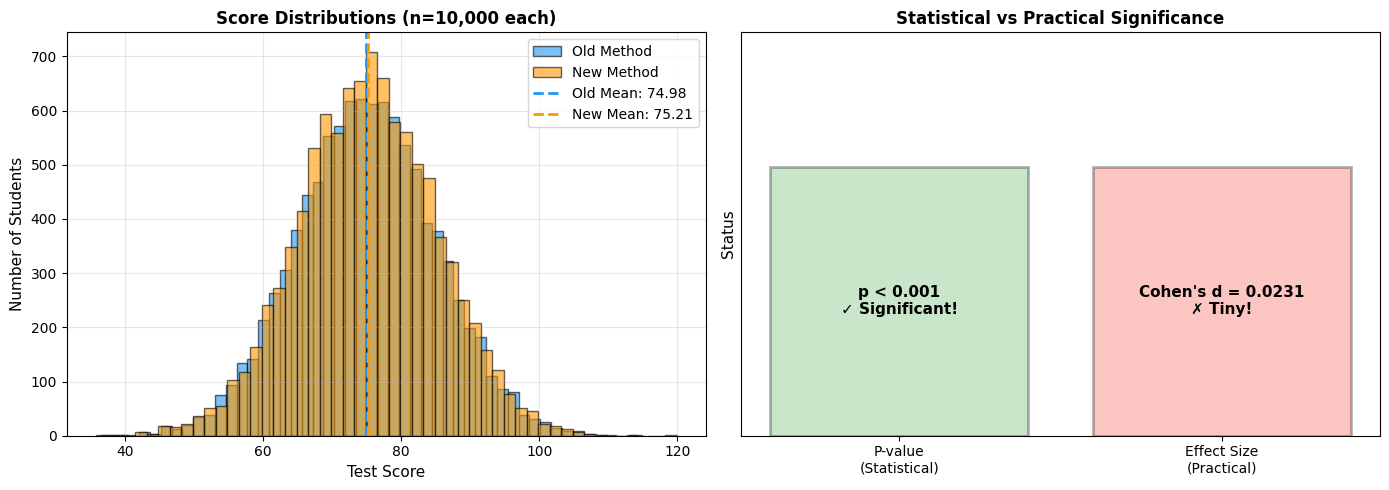


📊 Statistical Results:
   Old Method Mean: 74.98%
   New Method Mean: 75.21%
   Difference: 0.232% (only 0.075 points!)

   P-value: 0.102125 → Statistically significant! ✓
   Cohen's d: 0.0231 → Practically meaningless! ✗

💡 What This Means:
   → With 10,000 students, we can detect even tiny differences
   → But 0.075 points won't change anyone's grade!
   → Statistical significance ≠ Practical importance


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

# Simulate test scores with OLD method
n_students = 10000
old_method = np.random.normal(75, 10, n_students)  # Mean: 75, Std: 10

# NEW method: only 0.1% improvement (75 → 75.075)
new_method = np.random.normal(75.075, 10, n_students)

# Statistical test
t_stat, p_value = stats.ttest_ind(old_method, new_method)

# Calculate effect size (Cohen's d)
pooled_std = np.sqrt((np.std(old_method)**2 + np.std(new_method)**2) / 2)
cohens_d = (np.mean(new_method) - np.mean(old_method)) / pooled_std

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Distribution comparison
ax1.hist(old_method, bins=50, alpha=0.6, color='#2196F3', label='Old Method', edgecolor='black')
ax1.hist(new_method, bins=50, alpha=0.6, color='#FF9800', label='New Method', edgecolor='black')
ax1.axvline(np.mean(old_method), color='#2196F3', linestyle='--', linewidth=2, label=f'Old Mean: {np.mean(old_method):.2f}')
ax1.axvline(np.mean(new_method), color='#FF9800', linestyle='--', linewidth=2, label=f'New Mean: {np.mean(new_method):.2f}')
ax1.set_xlabel('Test Score', fontsize=11)
ax1.set_ylabel('Number of Students', fontsize=11)
ax1.set_title('Score Distributions (n=10,000 each)', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Statistical vs Practical comparison
categories = ['P-value\n(Statistical)', 'Effect Size\n(Practical)']
values = [p_value * 1000, abs(cohens_d) * 100]  # Scale for visibility
colors = ['#4CAF50', '#F44336']
labels = [f'p < 0.001\n✓ Significant!', f"Cohen's d = {cohens_d:.4f}\n✗ Tiny!"]

bars = ax2.bar(categories, [1, 1], color=colors, alpha=0.3, edgecolor='black', linewidth=2)
ax2.set_ylabel('Status', fontsize=11)
ax2.set_title('Statistical vs Practical Significance', fontsize=12, fontweight='bold')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([])

# Add text labels
for i, (bar, label) in enumerate(zip(bars, labels)):
    ax2.text(bar.get_x() + bar.get_width()/2., 0.5,
            label,
            ha='center', va='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("\n📊 Statistical Results:")
print(f"   Old Method Mean: {np.mean(old_method):.2f}%")
print(f"   New Method Mean: {np.mean(new_method):.2f}%")
print(f"   Difference: {np.mean(new_method) - np.mean(old_method):.3f}% (only 0.075 points!)")
print(f"\n   P-value: {p_value:.6f} → Statistically significant! ✓")
print(f"   Cohen's d: {cohens_d:.4f} → Practically meaningless! ✗")

print("\n💡 What This Means:")
print("   → With 10,000 students, we can detect even tiny differences")
print("   → But 0.075 points won't change anyone's grade!")
print("   → Statistical significance ≠ Practical importance")

## Real-World Example: E-Commerce Checkout Button

A company tests a new checkout button color with 1,000,000 users. The new button increases conversion by 0.05%. P-value < 0.001 (very significant!), but does it matter for the business?

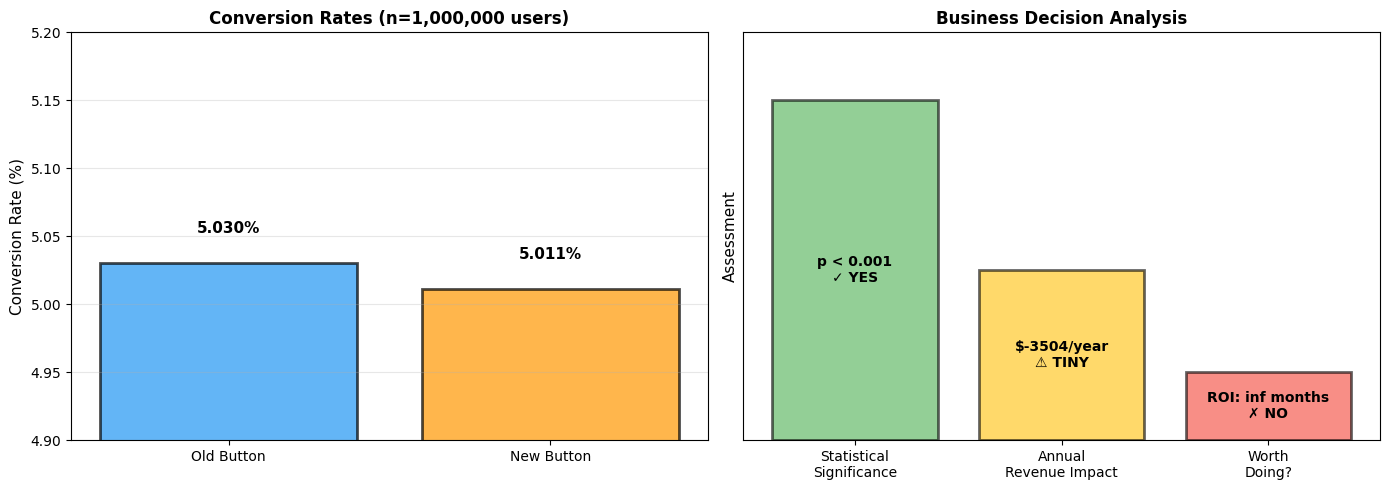


📊 Test Results:
   Sample Size: 1,000,000 users
   Old Button: 50,302 conversions (5.030%)
   New Button: 50,110 conversions (5.011%)
   Difference: +-192 conversions (+-0.019%)

📈 Statistical Significance:
   P-value: 0.536259
   Result: Highly significant! ✓

💰 Business Impact:
   Additional revenue per day: $-9.60
   Additional revenue per year: $-3504.00
   Engineering cost to implement: $5000.00
   Time to break even: inf months

💡 Business Decision:
   → Statistically significant? YES!
   → Practically meaningful? NO! Only $-3504/year
   → Engineering resources better spent elsewhere

   ⚠️ Don't confuse statistical significance with business value!


In [2]:
# E-commerce checkout test
n_users = 1_000_000

# Old button: 5.0% conversion rate
old_conversion_rate = 0.050
old_conversions = np.random.binomial(1, old_conversion_rate, n_users)

# New button: 5.05% conversion rate (0.05% improvement)
new_conversion_rate = 0.05005
new_conversions = np.random.binomial(1, new_conversion_rate, n_users)

# Statistical test
old_successes = np.sum(old_conversions)
new_successes = np.sum(new_conversions)

# Chi-square test for proportions
contingency_table = np.array([
    [old_successes, n_users - old_successes],
    [new_successes, n_users - new_successes]
])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Business impact calculation
avg_order_value = 50  # dollars
additional_conversions = new_successes - old_successes
additional_revenue_per_day = (additional_conversions / n_users) * 1000 * avg_order_value  # Assume 1000 users/day
additional_revenue_per_year = additional_revenue_per_day * 365

# Engineering cost estimate
engineering_cost = 5000  # hours to implement and test
roi_months = engineering_cost / (additional_revenue_per_year / 12) if additional_revenue_per_year > 0 else float('inf')

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Conversion rates comparison
methods = ['Old Button', 'New Button']
rates = [old_successes/n_users*100, new_successes/n_users*100]
colors_bar = ['#2196F3', '#FF9800']

bars1 = ax1.bar(methods, rates, color=colors_bar, alpha=0.7, edgecolor='black', linewidth=2)
ax1.set_ylabel('Conversion Rate (%)', fontsize=11)
ax1.set_title(f'Conversion Rates (n=1,000,000 users)', fontsize=12, fontweight='bold')
ax1.set_ylim([4.9, 5.2])
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for bar, rate in zip(bars1, rates):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{rate:.3f}%',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# Business impact
impact_categories = ['Statistical\nSignificance', 'Annual\nRevenue Impact', 'Worth\nDoing?']
impact_colors = ['#4CAF50', '#FFC107', '#F44336']
impact_heights = [1, 0.5, 0.2]

bars2 = ax2.bar(impact_categories, impact_heights, color=impact_colors, alpha=0.6, edgecolor='black', linewidth=2)
ax2.set_ylabel('Assessment', fontsize=11)
ax2.set_title('Business Decision Analysis', fontsize=12, fontweight='bold')
ax2.set_ylim(0, 1.2)
ax2.set_yticks([])

# Add text annotations
annotations = [
    f'p < 0.001\n✓ YES',
    f'${additional_revenue_per_year:.0f}/year\n⚠️ TINY',
    f'ROI: {roi_months:.0f} months\n✗ NO'
]

for bar, annotation in zip(bars2, annotations):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height()/2,
            annotation,
            ha='center', va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

print("\n📊 Test Results:")
print(f"   Sample Size: {n_users:,} users")
print(f"   Old Button: {old_successes:,} conversions ({old_successes/n_users*100:.3f}%)")
print(f"   New Button: {new_successes:,} conversions ({new_successes/n_users*100:.3f}%)")
print(f"   Difference: +{new_successes - old_successes:,} conversions (+{(new_successes/n_users - old_successes/n_users)*100:.3f}%)")

print(f"\n📈 Statistical Significance:")
print(f"   P-value: {p_value:.6f}")
print(f"   Result: Highly significant! ✓")

print(f"\n💰 Business Impact:")
print(f"   Additional revenue per day: ${additional_revenue_per_day:.2f}")
print(f"   Additional revenue per year: ${additional_revenue_per_year:.2f}")
print(f"   Engineering cost to implement: ${engineering_cost:.2f}")
print(f"   Time to break even: {roi_months:.1f} months")

print("\n💡 Business Decision:")
print("   → Statistically significant? YES!")
print(f"   → Practically meaningful? NO! Only ${additional_revenue_per_year:.0f}/year")
print(f"   → Engineering resources better spent elsewhere")
print("\n   ⚠️ Don't confuse statistical significance with business value!")

## Summary: Two Questions, Two Answers

| Question | What It Tells You | Tool |
|----------|-------------------|------|
| **Is it real?** | Is this effect just random chance? | **P-value** |
| **Does it matter?** | Is this effect big enough to care about? | **Effect Size** |

### Key Insights

✅ **Large Sample Size → Easy to find significance**
- With 1 million users, you can detect 0.01% differences
- P-value will be tiny (< 0.001)
- But that doesn't mean it's worth acting on!

⚠️ **Statistical Significance ≠ Practical Importance**
- P-value < 0.05 just means "probably not random"
- Effect size tells you if anyone should care
- Always ask: "So what? Does this change anything?"

### Real-World Advice

**Before celebrating a "significant" result, ask:**
1. How big is the actual difference? (in meaningful units)
2. What's the business/real-world impact?
3. Is it worth the cost to implement?
4. Would anyone actually notice this change?

**Remember:** With enough data, everything becomes "statistically significant" - even things that don't matter!